In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import simps

min cost 62.9303546618396
with v rate 0.0
max cost 63.62623891870885
with v rate 0.010121


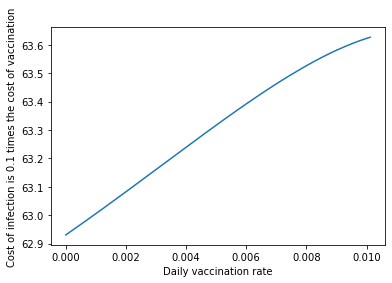

min cost 63.889794880664404
with v rate 0.0
max cost 64.24679702625244
with v rate 0.010034


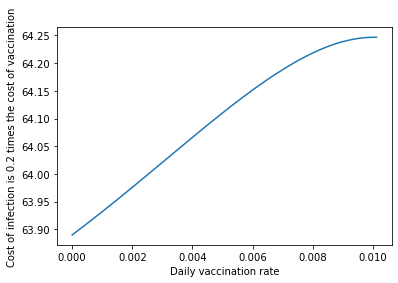

min cost 64.84923509948922
with v rate 0.0
max cost 64.91454126464588
with v rate 0.007005


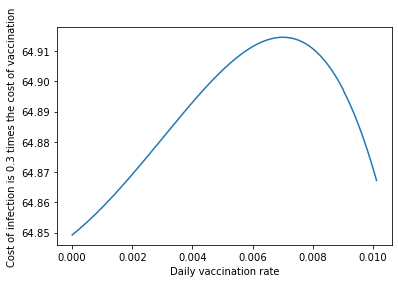

min cost 65.48771454473149
with v rate 0.010121
max cost 65.80867531831402
with v rate 0.0


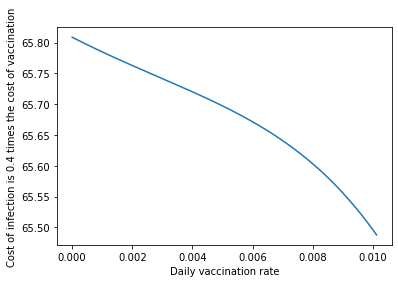

min cost 66.10820642007236
with v rate 0.010121
max cost 66.76811553713883
with v rate 0.0


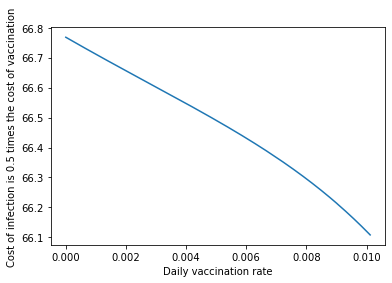

In [7]:
rates = np.linspace(0, 0.010121, 10122)
costrel = [0.1, 0.2, 0.3, 0.4, 0.5]

for rel in costrel:
    cost_v = 1.0
    cost_i = rel
    
    x_rates = []
    y_cost = []
    
    for vrate in rates:
        x_rates.append(vrate)
        def SEIR(X,t, beta, x, e, sigma, gamma):    
            S, E, I, R = X[0], X[1], X[2], X[3]    
            dSdt = - beta*S*I*(1-e*x) - x*e*S
            dEdt = beta*S*I*(1-e*x) - (sigma)*E
            dIdt = sigma*E - (gamma)*I
            dRdt = gamma*I + x*e*S   
            return [dSdt, dEdt, dIdt, dRdt]    
        def inter(beta, x, e, sigma, gamma):
            X = odeint(SEIR, [0.994, 0.00019065, 0.00019065, 0.005569], np.linspace(0,200,200), args=(beta, x, e, sigma, gamma))
            S = X[:,0]
            E = X[:,1]
            I = X[:,2]
            R = X[:,3]

            tot_s = integrate.simps(S)
            tot_I = integrate.simps(I) + integrate.simps(E) 

            return tot_s, tot_I

        susceptible, infected = inter(0.462, vrate, 0.52, 0.25, 0.157)

        total_cost = (susceptible*cost_v) + (infected*cost_i)
        y_cost.append(total_cost)
        
    print('min cost',min(y_cost))
    print('with v rate',x_rates[y_cost.index(min(y_cost))])
    
    print('max cost',max(y_cost))
    print('with v rate',x_rates[y_cost.index(max(y_cost))])
    
    plt.plot(x_rates,y_cost)
    plt.xlabel("Daily vaccination rate")
    plt.ylabel(f"Cost of infection is {cost_i} times the cost of vaccination")
    plt.show()

min cost 70.7652712082074
with v rate 0.010121
max cost 72.95058743738119
with v rate 0.0


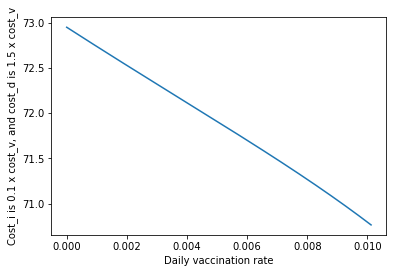

min cost 71.34744428739286
with v rate 0.010121
max cost 73.87672651416987
with v rate 0.0


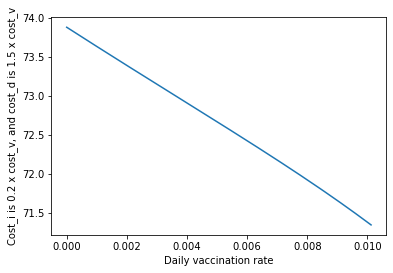

min cost 73.09396352494926
with v rate 0.010121
max cost 76.65514374453596
with v rate 0.0


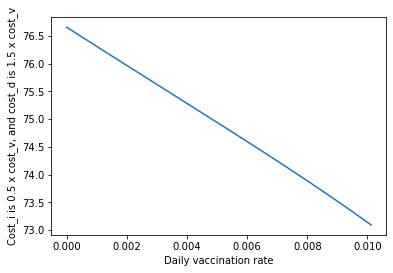

min cost 81.20016644204077
with v rate 0.010121
max cost 90.47413014461688
with v rate 0.0


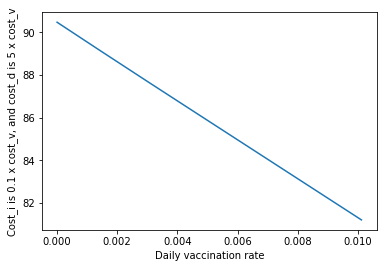

min cost 81.78233952122623
with v rate 0.010121
max cost 91.40026922140557
with v rate 0.0


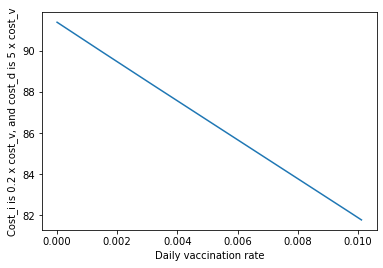

min cost 83.52885875878263
with v rate 0.010121
max cost 94.17868645177165
with v rate 0.0


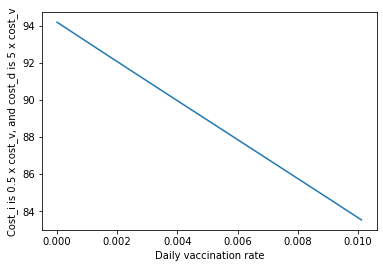

min cost 96.1071596332313
with v rate 0.010121
max cost 115.50776258352501
with v rate 0.0


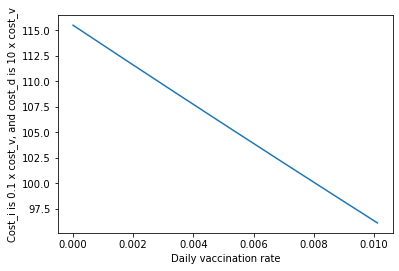

min cost 96.68933271241677
with v rate 0.010121
max cost 116.4339016603137
with v rate 0.0


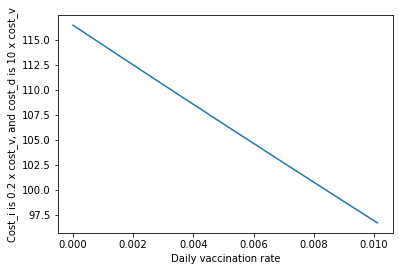

min cost 98.43585194997317
with v rate 0.010121
max cost 119.21231889067978
with v rate 0.0


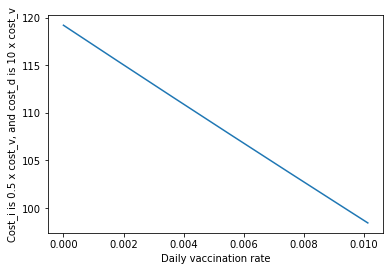

In [8]:
rates = np.linspace(0, 0.010121, 5061)

costrel = [0.1, 0.2, 0.5]
costrel_death = [1.5, 5, 10]

for rel_a in costrel_death:
    cost_d = rel_a
    for rel in costrel:
        cost_v = 1.0
        cost_i = rel

        x_rates = []
        y_cost = []

        for vrate in rates:
            x_rates.append(vrate)
            def SEIRD(X,t, beta, x, e, sigma, gamma, delta, x2):    
                S, E, I, R, D = X[0], X[1], X[2], X[3], X[4]    
                dSdt = - beta*S*I*(1-e*x) - x*e*S
                dEdt = beta*S*I*(1-e*x) - (sigma)*E
                dIdt = sigma*E - (gamma)*I - delta*I*( 1-x + x*(1-x2) )
                dRdt = gamma*I + x*e*S   
                dDdt = delta*I*( 1-x + x*(1-x2) )
                return [dSdt, dEdt, dIdt, dRdt, dDdt]    
            def inter(beta, x, e, sigma, gamma, delta, x2):
                X = odeint(SEIRD, [0.994, 0.00019065, 0.00019065, 0.005569, 0], np.linspace(0,200,200), args=(beta, x, e, sigma, gamma,delta, x2))
                S = X[:,0]
                E = X[:,1]
                I = X[:,2]
                R = X[:,3]
                D = X[:,4]

                tot_s = integrate.simps(S)
                tot_I = integrate.simps(I) + integrate.simps(E) 
                tot_D = integrate.simps(D)

                return tot_s, tot_I, tot_D

            susceptible, infected, dead = inter(0.462, vrate, 0.52, 0.25, 0.157, 0.0066, 0.85)

            total_cost = (susceptible*cost_v) + (infected*cost_i) + (dead*cost_d)
            y_cost.append(total_cost)
        
        print('min cost',min(y_cost))
        print('with v rate',x_rates[y_cost.index(min(y_cost))])

        print('max cost',max(y_cost))
        print('with v rate',x_rates[y_cost.index(max(y_cost))])

        plt.plot(x_rates,y_cost)
        plt.xlabel("Daily vaccination rate")
        plt.ylabel(f"Cost_i is {cost_i} x cost_v, and cost_d is {cost_d} x cost_v")
        plt.show() 